


# Regresion lineal Simple


1. Planteamiento del Problema:
El aumento de las emisiones de CO2, especialmente en la industria automotriz, ha generado preocupación mundial debido a su impacto en el cambio climático. Los motores de combustión interna continúan siendo una fuente significativa de emisiones de gases de efecto invernadero. En respuesta, existe la necesidad urgente de desarrollar modelos predictivos que permitan a los fabricantes optimizar el rendimiento del motor y minimizar las emisiones de CO2. El reto radica en cómo utilizar herramientas avanzadas de inteligencia artificial para predecir y reducir las emisiones sin comprometer la eficiencia del motor.

2. Método a Utilizar:
Para abordar este problema, se propone un enfoque basado en el uso de modelos de machine learning, específicamente redes neuronales y algoritmos de regresión, para predecir las emisiones de CO2 en función de las variables del motor, como la velocidad, carga, temperatura, entre otras. El proyecto se centrará en:

* Recopilar datos históricos de motores que incluyan características clave y niveles de emisiones.
Preprocesar los datos para eliminar valores atípicos, normalizar y preparar las variables relevantes.
Entrenar y validar un modelo predictivo utilizando técnicas como la regresión lineal múltiple o redes neuronales profundas.
Evaluar el modelo usando métricas de precisión como el RMSE (Root Mean Squared Error) o R² (coeficiente de determinación).

4. Resultado a Alcanzar:
El objetivo final es desarrollar un modelo que sea capaz de predecir con alta precisión las emisiones de CO2 de un motor, dados ciertos parámetros de operación. Con este modelo, se pretende ofrecer una herramienta que permita a los fabricantes optimizar sus motores para reducir las emisiones, cumpliendo con regulaciones ambientales más estrictas y contribuyendo a la mitigación del cambio climático.


### Paquetes necesarios


In [ ]:
pip install scikit-learn
pip install matplotlib
pip install pandas 
pip install numpy 


%matplotlib inline

SyntaxError: invalid syntax (3103136901.py, line 1)

In [13]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


## Comprendiendo los datos

### `Data.csv`:
**`Data.csv`**, que contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos ligeros nuevos para la venta minorista en Canadá.

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Leyendo los datos:


In [4]:
df = pd.read_csv("data/Data.csv")

# Nuestros datos
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.VEHICLECLASS.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [6]:
df.CYLINDERS.unique()

array([ 4,  6, 12,  8, 10,  3,  5])

In [7]:
df.TRANSMISSION.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [8]:
df.FUELTYPE.unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [9]:
df.ENGINESIZE.unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2, 6. ,
       6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 1.8, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4])

### Exploración de datos
Exploración descriptiva de nuestros datos.


In [5]:
# Resumen de datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionemos algunas funciones para explorar más.


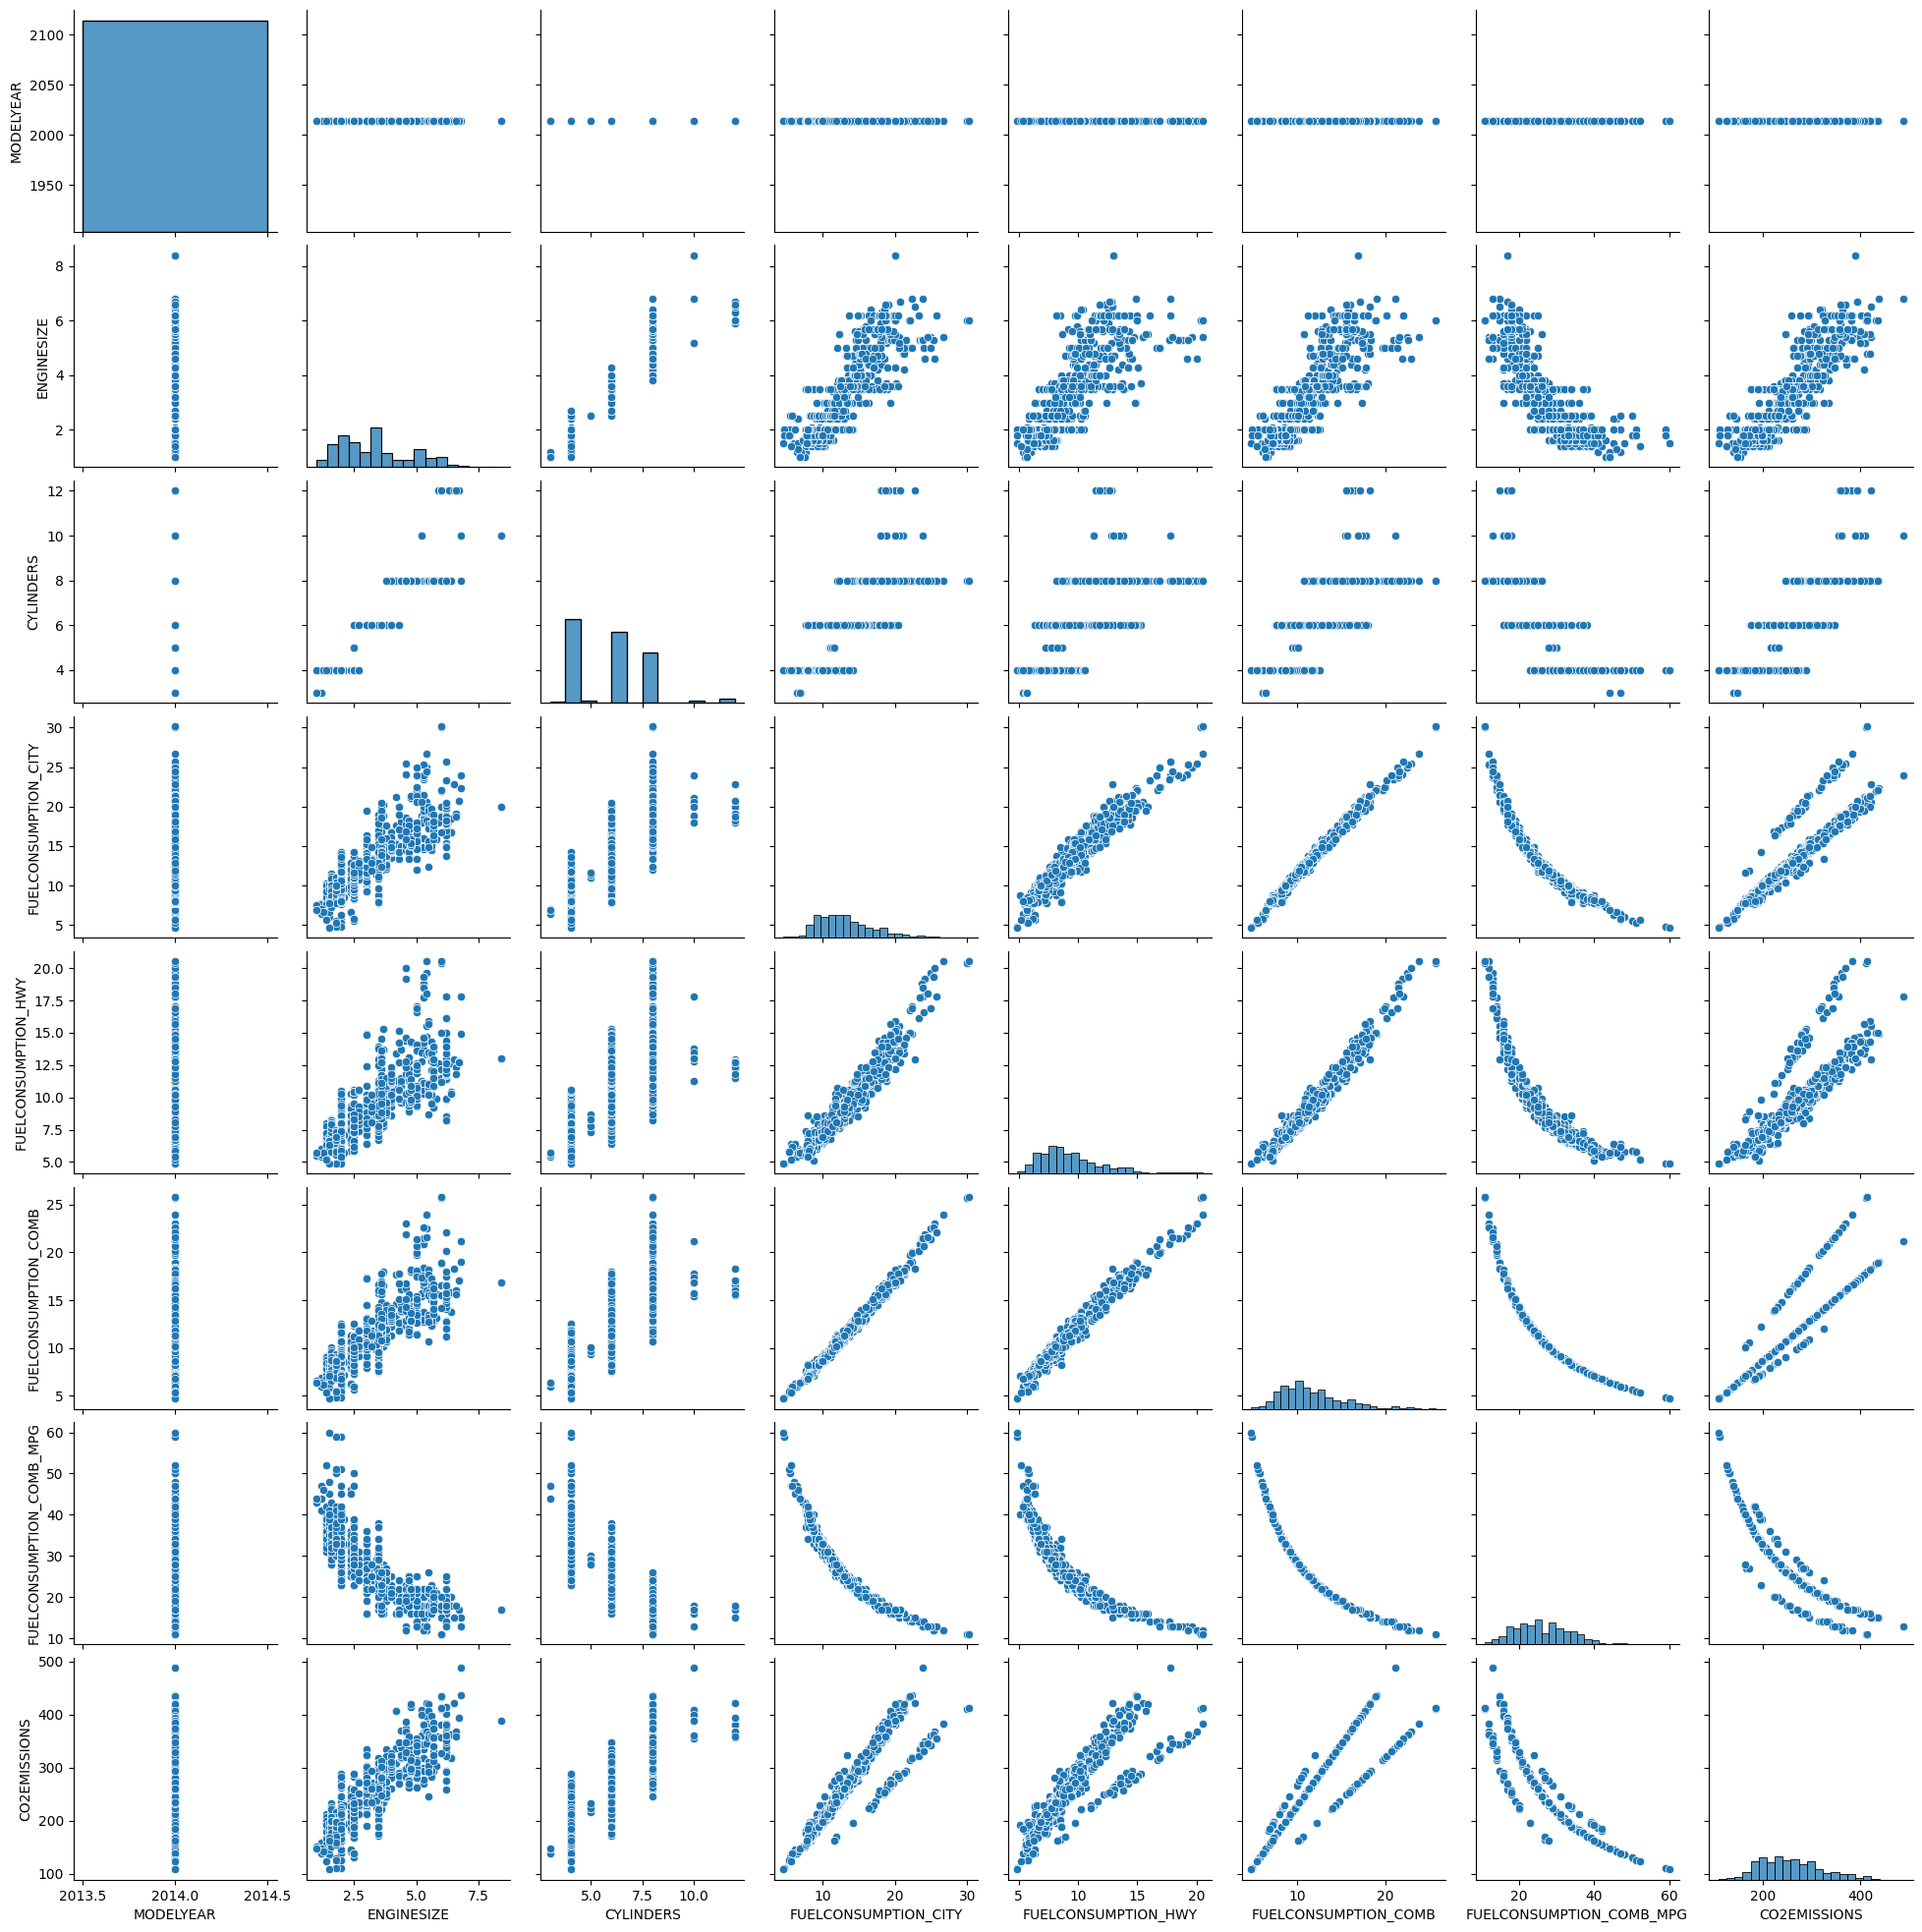

In [25]:
sns.pairplot(df)

In [18]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Trazamos cada una de estas características:


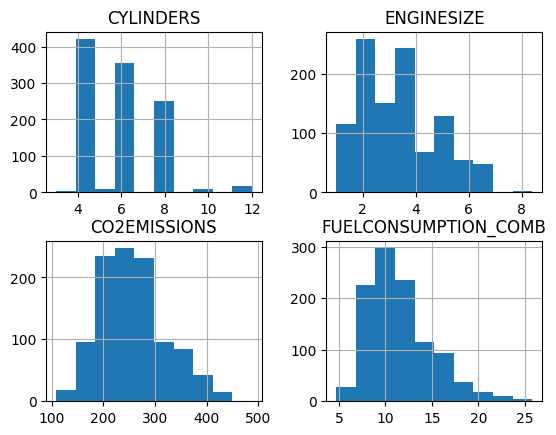

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Detalle grafico cada una de estas características frente a la Emisión, para ver cuán lineal es su relación:


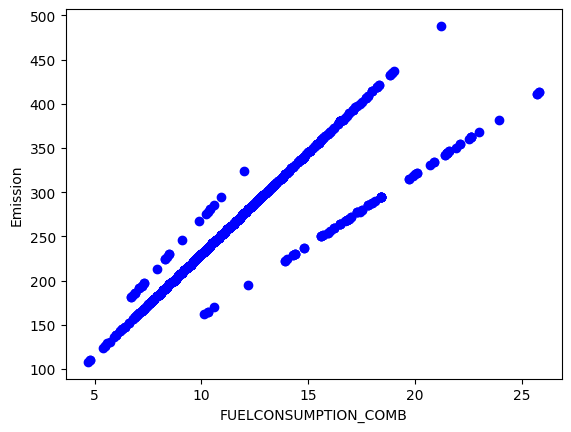

In [ ]:
# Grafico de combustible

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

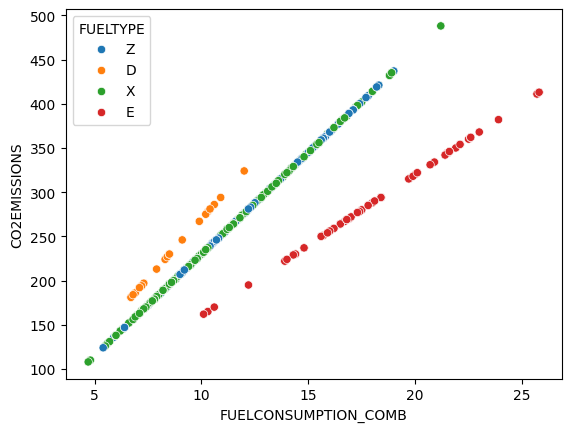

In [17]:
sns.scatterplot(data=df, x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', hue='FUELTYPE')
plt.show()

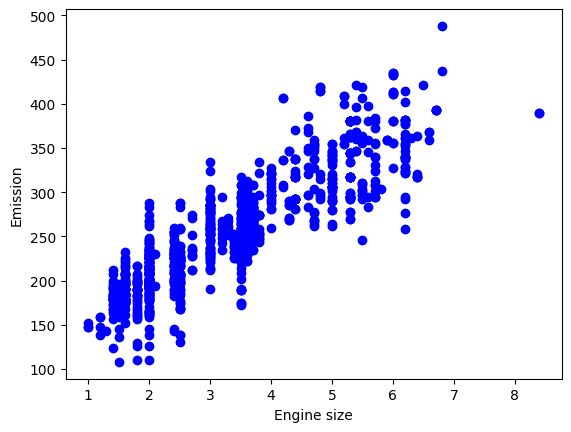

In [ ]:
# Grafico de motor  agrgar variable para detallar mas informacion

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Cilindros
Traza de  __CYLINDER__ frente a la emisión, para ver qué tan lineal es su relación:


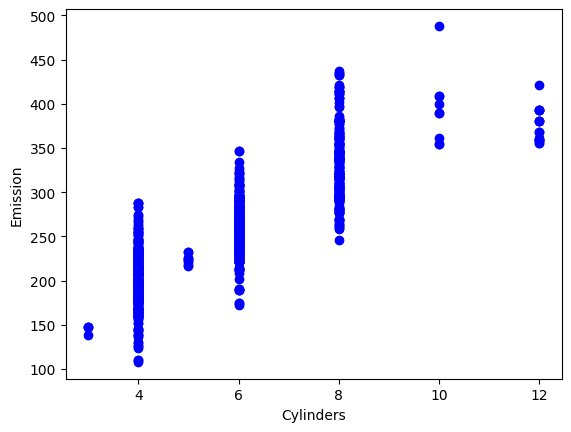

In [35]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()




#### Creación de conjuntos de datos de prueba y tren
La división de entrenamiento/prueba implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba que son mutuamente excluyentes. Después de lo cual, entrenas con el conjunto de entrenamiento y pruebas con el conjunto de prueba. 
Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se utilizó para entrenar el modelo. Por lo tanto, nos brinda una mejor comprensión de qué tan bien se generaliza nuestro modelo con datos nuevos.

Esto significa que conocemos el resultado de cada punto de datos en el conjunto de datos de prueba, ¡lo que lo hace excelente para realizar pruebas! Dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, se trata verdaderamente de una prueba fuera de muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y de prueba. El 80% de todo el conjunto de datos se utilizará para entrenamiento y el 20% para pruebas. Creamos una máscara para seleccionar filas aleatorias usando la función __np.random.rand()__:

In [19]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [23]:
np.random.rand(len(df))<0.8

array([False,  True,  True, ...,  True,  True,  True])

In [20]:
train.shape


(828, 4)

In [21]:
test.shape

(239, 4)

### Modelo de regresión simple
La regresión lineal se ajusta a un modelo lineal con coeficientes B = (B1, ..., Bn) para minimizar la "suma residual de cuadrados" entre el valor real y en el conjunto de datos y el valor predicho yhat mediante una aproximación lineal


#### Distribución de datos del tren


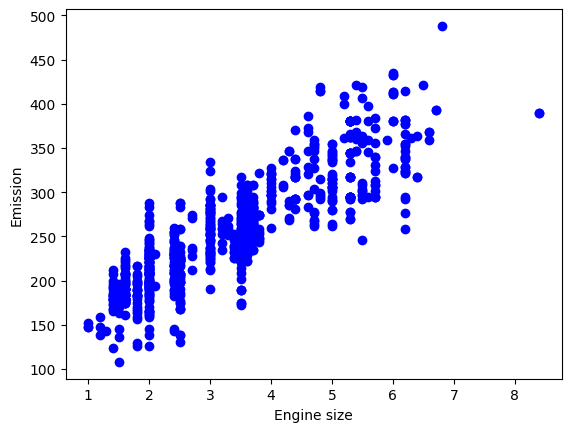

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modelado
Usando el paquete sklearn para modelar datos.


In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.41103106]]
Intercept:  [127.52624766]


Como se mencionó anteriormente, __Coeficiente__ y __Intercepción__ en la regresión lineal simple son los parámetros de la línea de ajuste. 
Dado que es una regresión lineal simple, con solo 2 parámetros, y sabiendo que los parámetros son la intersección y la pendiente de la línea, sklearn puede estimarlos directamente a partir de nuestros datos. 
Tenga en cuenta que todos los datos deben estar disponibles para recorrer y calcular los parámetros.


#### Trazar resultados


Trazamos la línea de ajuste sobre los datos:


Text(0, 0.5, 'Emission')

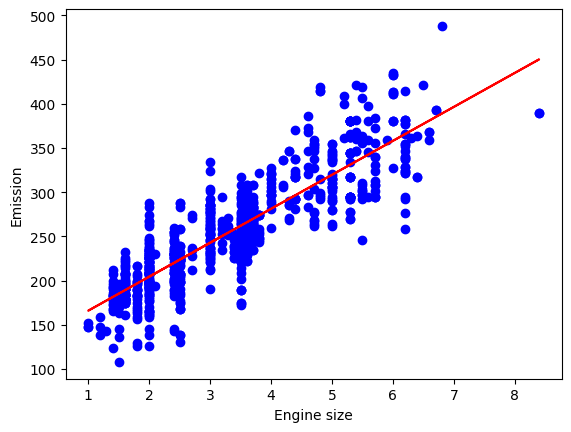

In [39]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación
Comparamos los valores reales y los valores predichos para calcular la precisión de un modelo de regresión. Las métricas de evaluación desempeñan un papel clave en el desarrollo de un modelo, ya que proporcionan información sobre áreas que requieren mejora.

Existen diferentes métricas de evaluación de modelos, usemos MSE aquí para calcular la precisión de nuestro modelo en función del conjunto de pruebas: 
* Error Absoluto Medio: Es la media del valor absoluto de los errores. Esta es la métrica más fácil de entender, ya que es solo un error promedio.

* Error cuadrático medio (MSE): El error cuadrático medio (MSE) es la media del error cuadrático. Es más popular que el error absoluto medio porque el enfoque está más orientado hacia errores grandes. Esto se debe a que el término cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.

* Error cuadrático medio (RMSE). 

* R cuadrado no es un error, sino más bien una métrica popular para medir el rendimiento de su modelo de regresión. Representa qué tan cerca están los puntos de datos de la línea de regresión ajustada. Cuanto mayor sea el valor de R cuadrado, mejor se ajustará el modelo a sus datos. La mejor puntuación posible es 1,0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).


In [40]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 21.64
Residual sum of squares (MSE): 896.06
R2-score: 0.80


## Exploracion de datos



Veamos cuáles son las métricas de evaluación si entrenamos un modelo de regresión usando la función `FUELCONSUMPTION_COMB`.

Comience seleccionando `FUELCONSUMPTION_COMB` como los datos train_x del marco de datos `train`, luego seleccione `FUELCONSUMPTION_COMB` como los datos test_x del marco de datos `test`


In [24]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

Ahora entrene un modelo de regresión lineal usando el `train_x` que creó y el `train_y` creado anteriormente


In [42]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

Encuentre las predicciones usando la función `predict` del modelo y los datos `test_x`

In [43]:
predictions = regr.predict(test_x)

Finalmente use las `predicciones` y los datos `test_y` y encuentre el valor del error absoluto medio usando las funciones `np.absolute` y `np.mean` como se hizo anteriormente


In [44]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))


Mean Absolute Error: 21.25


Podemos ver que el MAE es mucho peor cuando entrenamos usando `ENGINESIZE` que `FUELCONSUMPTION_COMB`





## Integrantes











